In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout 

# Define data directories and parameters
train_data_dir = r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\MNIST\trainingSample'
validation_data_dir = r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\MNIST\testSample'
img_height = 128
img_width = 128
batch_size = 16
num_classes = 10  # Number of classes for multi-class classification
epochs = 60

# Create data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators from directories
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Multi-class classification
)


# Model Definition
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')  # Multi-class classification
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Multi-class classification
              metrics=['accuracy'])

# Print model summary
model.summary()

print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")

# Implement Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]  # Early stopping callback 
)

# Model Evaluation
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Test accuracy:', (test_acc) * 100)

# Save the model
model.save("number_prediction_model.h5")
# Load the trained model
model = tf.keras.models.load_model('number_prediction_model.h5')


Found 600 images belonging to 10 classes.


Found 300 images belonging to 10 classes.


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_103 (Conv2D)             │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,330 (8.27 MB)

 Trainable params: 2,168,330 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

Number of training samples: 600
Number of validation samples: 300
Epoch 1/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 420ms/step - accuracy: 0.0864 - loss: 2.3212 - val_accuracy: 0.0972 - val_loss: 2.3027
Epoch 2/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 2.3141 - val_accuracy: 0.1667 - val_loss: 2.3023
Epoch 3/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 430ms/step - accuracy: 0.0692 - loss: 2.3032 - val_accuracy: 0.0938 - val_loss: 2.3027
Epoch 4/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1250 - loss: 2.3032 - val_accuracy: 0.2500 - val_loss: 2.3012
Epoch 5/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 419ms/step - accuracy: 0.1094 - loss: 2.3028 - val_accuracy: 0.1042 - val_loss: 2.3027
Epoch 6/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0625 - loss: 2.3096 - val_accuracy: 0.0000e+00 - val_loss: 2.3005
Epoch 7/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 432ms/step - accuracy: 0.0799 - loss: 2.3036 - val_accuracy: 0.1007 - val_loss: 2.3025
Epoch 8/60
37/37 ━━━━━━━━━━━━━━━

Test accuracy: 10.06944477558136


In [46]:
# Image prediction
import cv2

# Assuming the uploaded file is named 'your_image.jpg'
image_path = r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\MNIST\testSample\4\img_299.jpg'

# Load and preprocess your image
image = cv2.imread(image_path)
image = cv2.resize(image, (img_height, img_width))
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=0)

# Make predictions
predictions = model.predict(image)
class_labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']  
predicted_class = class_labels[np.argmax(predictions)]

print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Predicted Class: four


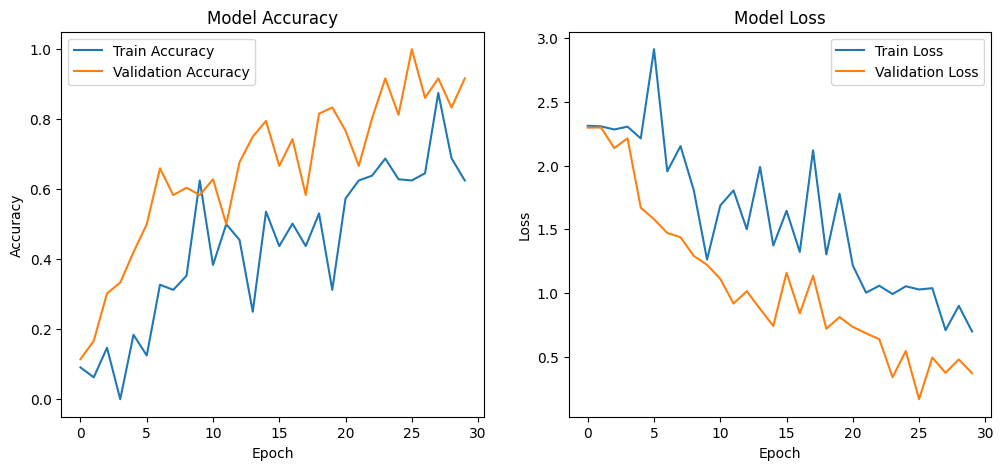

In [47]:
import matplotlib.pyplot as plt
# Step 5: Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
